<a href="https://colab.research.google.com/github/pra-sh-ant/EDA/blob/main/EDA_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Prashant Singh

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from google.colab import drive
from wordcloud import WordCloud
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
# for removing Future Warnings in seaborn plots
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
     

In [ ]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-ticks')
sns.set_style("whitegrid")

### Dataset Loading

In [ ]:
# Load Dataset
db1 = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Modules/Topic/Data Files/dat/Copy of Play Store Data.csv")
db2 = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Modules/Topic/Data Files/dat/Copy of User Reviews.csv")

### Dataset First View

In [ ]:
# Dataset First Look
db1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
db1.shape

(10841, 13)

### Dataset Information

In [ ]:
# Dataset Info
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [ ]:
duplicate = db1[db1.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
# Dataset Duplicate Value Count
db1.duplicated().sum()


483

In [ ]:
db1.drop_duplicates(inplace = True)

In [ ]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
db1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

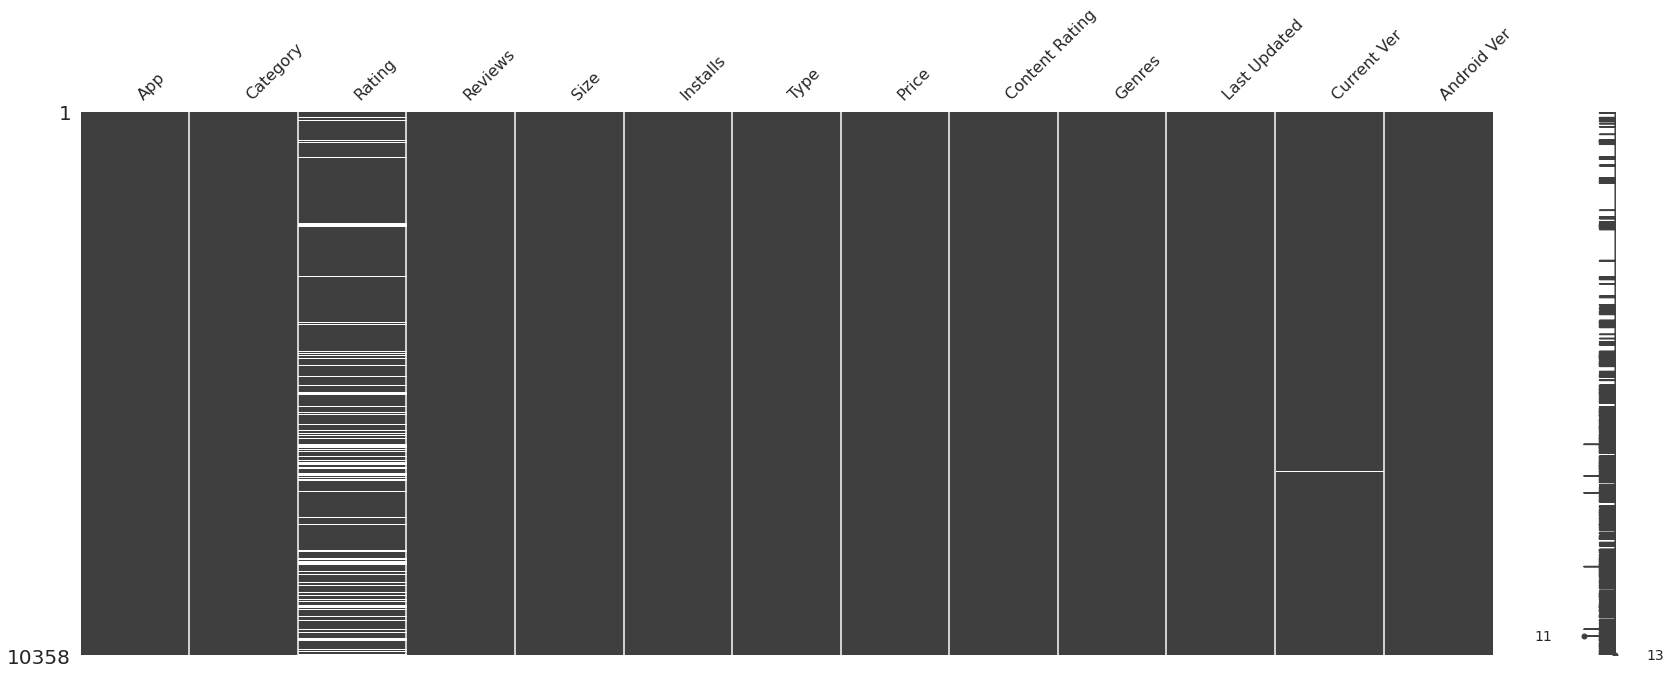

In [ ]:
# Visualizing the missing values
msno.matrix(db1)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
db1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Dataset Describe
db1.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
db1.apply(lambda col: col.unique())


App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...
Rating            [4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...
Reviews           [159, 967, 87510, 215644, 167, 178, 36815, 137...
Size              [19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3....
Installs          [10,000+, 500,000+, 5,000,000+, 50,000,000+, 1...
Type                                           [Free, Paid, nan, 0]
Price             [0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ...
Content Rating    [Everyone, Teen, Everyone 10+, Mature 17+, Adu...
Genres            [Art & Design, Art & Design;Pretend Play, Art ...
Last Updated      [January 7, 2018, January 15, 2018, August 1, ...
Current Ver       [1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1,...
Android Ver       [4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and...
dtype: object

In [ ]:
db1.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
 db1[db1.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
db1.drop([10472], inplace =True)


In [ ]:
#Function to convert Size in correct format
def format(value):
  if value[-1:] == "k":
     return float(value[0:-1])/1000
  elif value[-1:] == "M":
     return  value
  else:
     return np.nan 
db1.rename(columns = {'Size':'Size(Mb)'}, inplace = True)  

db1["Size(Mb)"]=db1["Size(Mb)"].map(lambda x: format(x))
# Replace "M" with an empty string 
db1["Size(Mb)"]=db1["Size(Mb)"].apply(lambda x: str(x).replace('M',"") if 'M' in str(x) else x)

In [ ]:
# Replace "$" sign with an empty string
db1["Price"]=db1["Price"].str.replace("$","")
     
# Replace  "+" and "," with an empty string
db1['Installs']= db1['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
db1['Installs']= db1['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [ ]:
# Correcting Android Version
db1['Android Ver']= db1['Android Ver'].apply(lambda x: str(x).replace('and','') if 'and' in str(x) else str(x))
db1['Android Ver']= db1['Android Ver'].apply(lambda x: str(x).replace('up','') if 'up' in str(x) else str(x))

In [ ]:
#Function to insert median in Null values of Rating Column
def ins_median(series):
  return series.fillna(series.median)

db1.Rating = db1['Rating'].transform(ins_median)

In [ ]:
# Filling all the null values with thier mode
db1['Type'].fillna(str(db1['Type'].mode().values[0]),inplace = True)
db1['Current Ver'].fillna(str(db1['Current Ver'].mode().values[0]),inplace = True)
#db1['Android Ver'].fillna(str(db1['Android Ver'].mode().values[0]),inplace = True)
db1['Content Rating'].fillna(str(db1['Content Rating'].mode().values[0]),inplace = True)
db1['Size(Mb)'].fillna(str(db1['Size(Mb)'].mode().values[0]),inplace = True)

In [ ]:
# Convert Data Types to Correct Format
db1["Size(Mb)"]=db1["Size(Mb)"].astype(float)
db1['Reviews'] = pd.to_numeric(db1['Reviews'], errors ='coerce')
db1["Rating"]=pd.to_numeric(db1["Rating"],errors='coerce')
db1["Android Ver"]=pd.to_numeric(db1["Android Ver"],errors='coerce')

In [ ]:
db1['Installs']= db1['Installs'].apply(lambda x: float(x))
db1['Price']= db1['Price'].apply(lambda x: float(x))


In [ ]:
db1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size(Mb)             0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver       3174
dtype: int64

In [ ]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size(Mb)        10357 non-null  float64
 5   Installs        10357 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     7377 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.1+ MB


### What all manipulations have you done and insights you found?

>
>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code



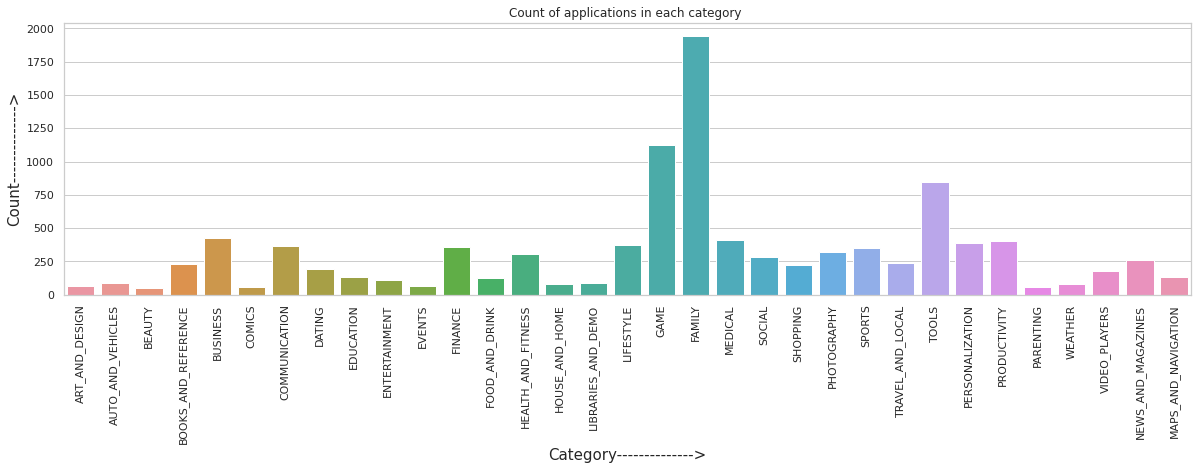

In [ ]:
sns.countplot('Category',data=db1)
plt.xlabel("Category-------------->", fontsize=15)
plt.ylabel("Count-------------->", fontsize=15)
plt.title("Count of applications in each category ")
plt.xticks(rotation=90)
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

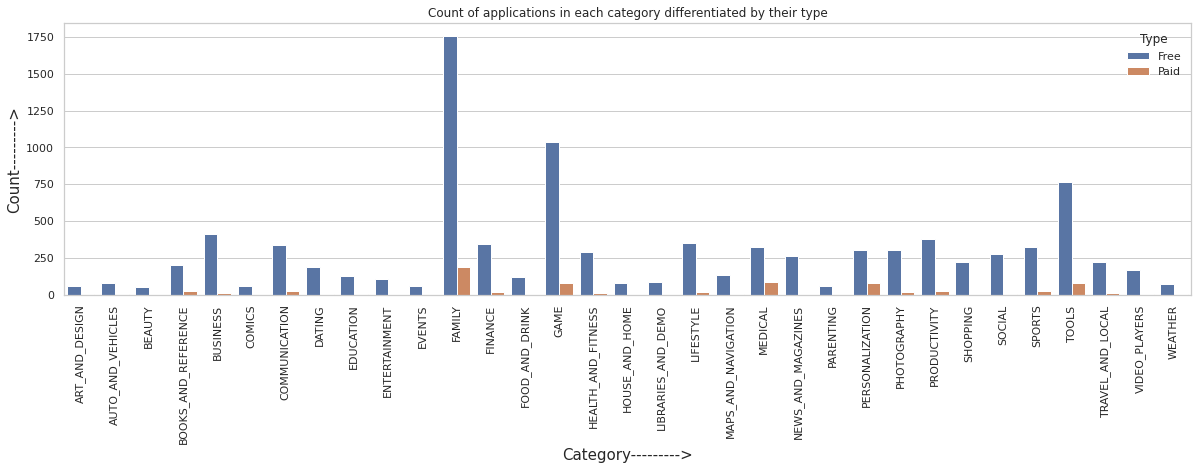

In [ ]:
# Chart - 2 visualization code
chart2 =db1.groupby(["Category","Type"])["App"].count().reset_index()
chart_2=pd.DataFrame(chart2)
sns.barplot(x="Category",y="App",hue="Type",data=chart_2,)
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Count--------->", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

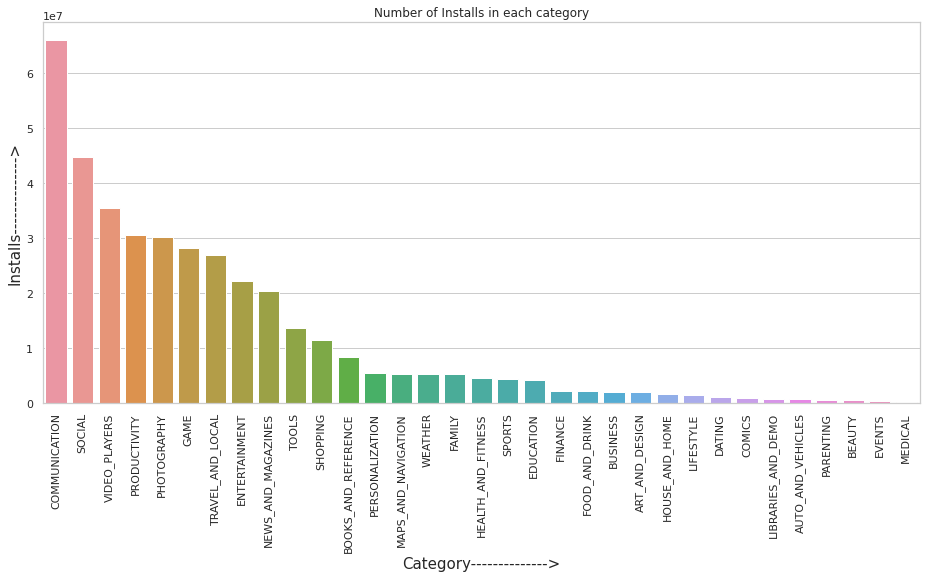

In [ ]:
# Chart - 3 visualization code
# here we are using group by function to group category and installs.
scene_1=(db1.groupby("Category").agg({"Installs":"mean"})
        .sort_values(by="Installs",ascending=False)
        .reset_index())
point_1=pd.DataFrame(scene_1)

# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
sns.barplot(y="Installs",x="Category",data=point_1)
plt.xlabel("Category-------------->", fontsize=15)
plt.ylabel("Installs-------------->", fontsize=15)
plt.title("Number of Installs in each category")
plt.xticks(rotation=90)
plt.show();
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

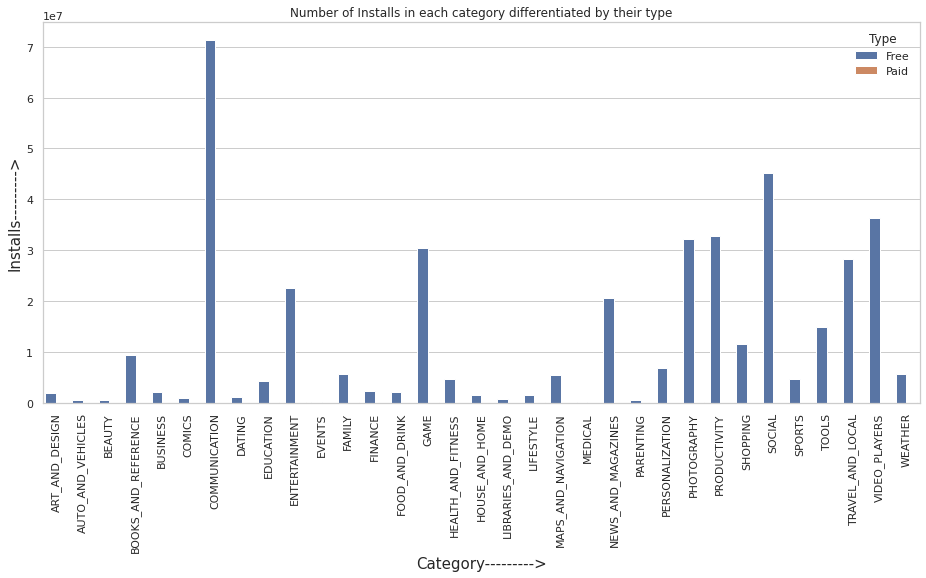

In [ ]:
# Chart - 4 visualization code
scene3=db1.groupby(["Category","Type"]).agg({"Installs":"mean"}).reset_index()
point3=pd.DataFrame(scene3)
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
sns.barplot(x="Category",y="Installs",hue="Type",data=point3)
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Installs--------->", fontsize=15)
plt.title("Number of Installs in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

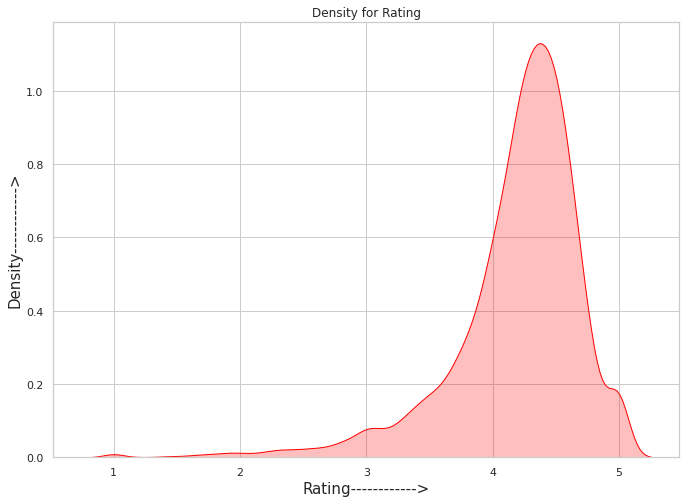

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10,8))
sns.kdeplot(db1["Rating"],color="red",shade = True)
plt.xlabel("Rating------------>", fontsize=15)
plt.ylabel("Density------------>", fontsize=15)
plt.title("Density for Rating")
plt.show();


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

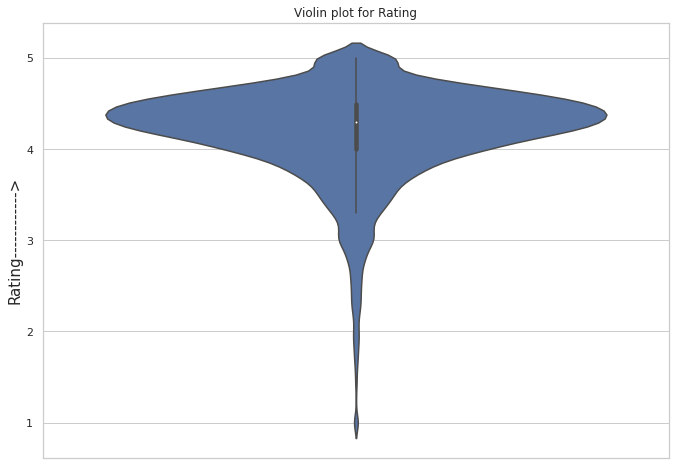

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,8))
sns.violinplot(y="Rating",data=db1 )
plt.ylabel("Rating------------>", fontsize=15)
plt.title("Violin plot for Rating")
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

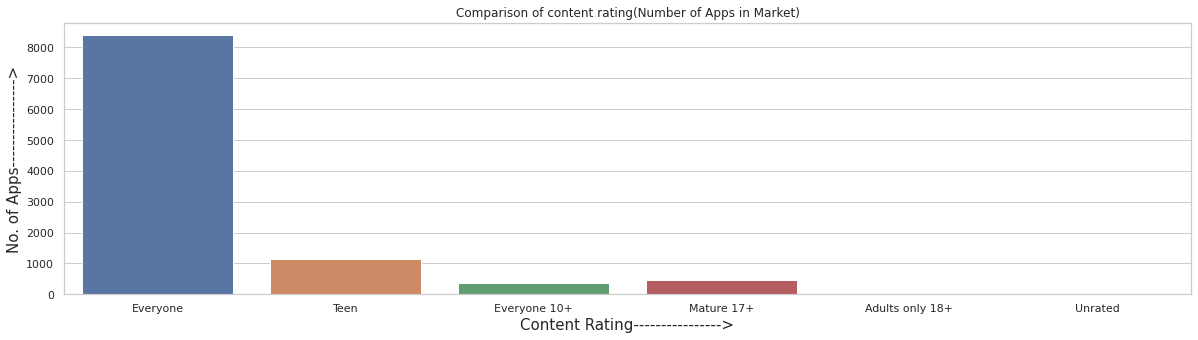

In [ ]:
# Chart - 7 visualization code
# we are using countplot to show the counts of content Rating
sns.countplot("Content Rating",data=db1)
plt.xlabel("Content Rating---------------->",fontsize=15)
plt.ylabel("No. of Apps---------------->",fontsize=15)
plt.title("Comparison of content rating(Number of Apps in Market)")
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

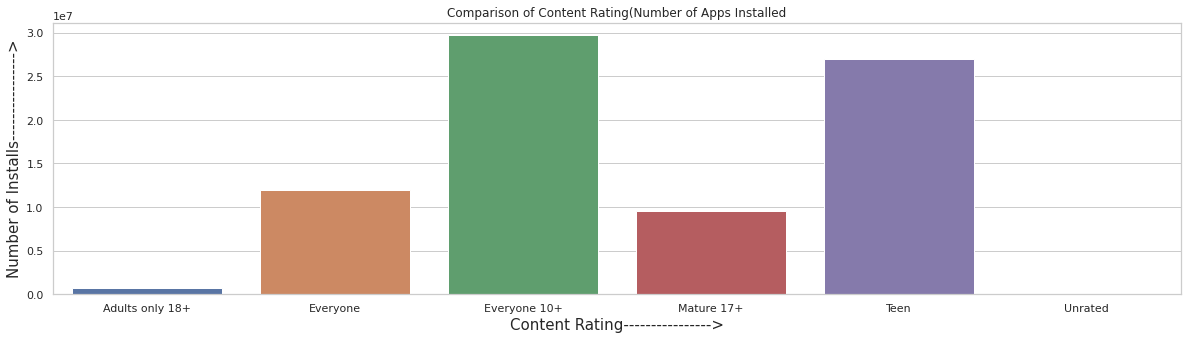

In [ ]:
# Chart - 8 visualization code
scene4=db1.groupby("Content Rating").agg({"Installs":"mean"}).reset_index()
point_4=pd.DataFrame(scene4)
point_4
# we are plotting bar plot for above grouped dataframe
sns.barplot(y="Installs",x="Content Rating",data=point_4)
plt.title("Comparison of Content Rating(Number of Apps Installed")
plt.ylabel("Number of Installs---------------->",fontsize=15)
plt.xlabel("Content Rating---------------->",fontsize=15)
# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

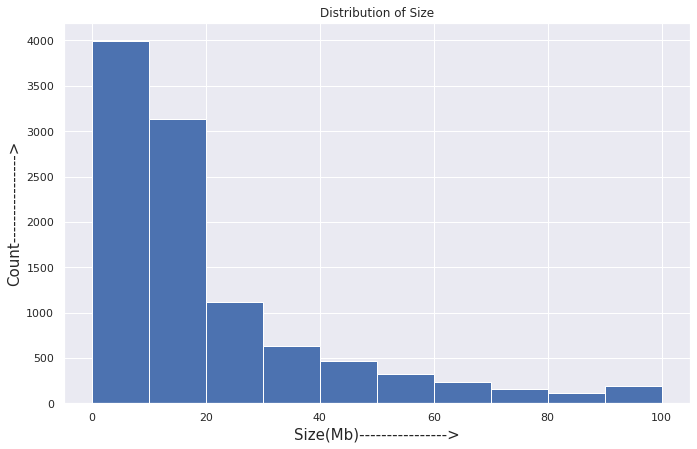

In [ ]:
# Chart - 9 visualization code
# Histogram
plt.figure(figsize=(10,7))
plt.hist(db1['Size(Mb)'])
plt.xlabel("Size(Mb)---------------->",fontsize=15)
plt.ylabel("Count---------------->",fontsize=15)
plt.title("Distribution of Size")
plt.show();
     


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

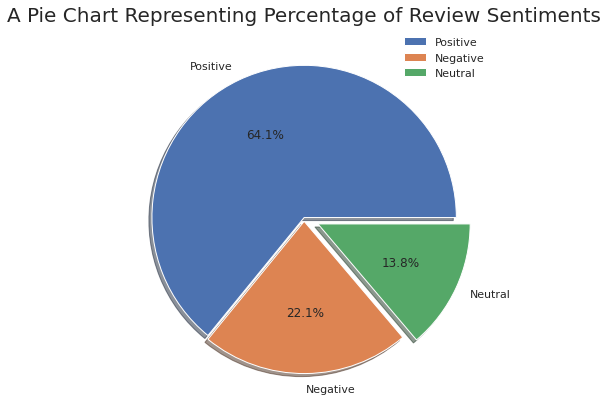

In [ ]:
# Chart - 10 visualization code
#Piechart
plt.figure(figsize=(10,7))
slices=db2.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
plt.pie(slices,labels=labels,explode=explode,autopct='%1.1F%%',shadow=True);
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.legend()
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

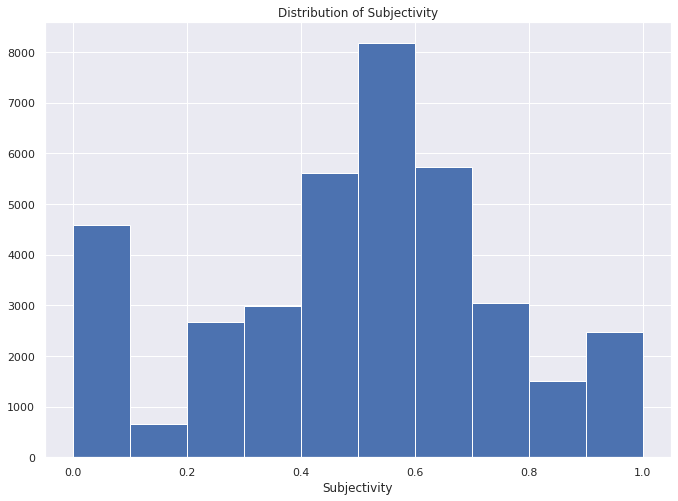

In [ ]:
# Chart - 11 visualization code

#Histogram
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(db2.Sentiment_Subjectivity.values,)
plt.show();
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

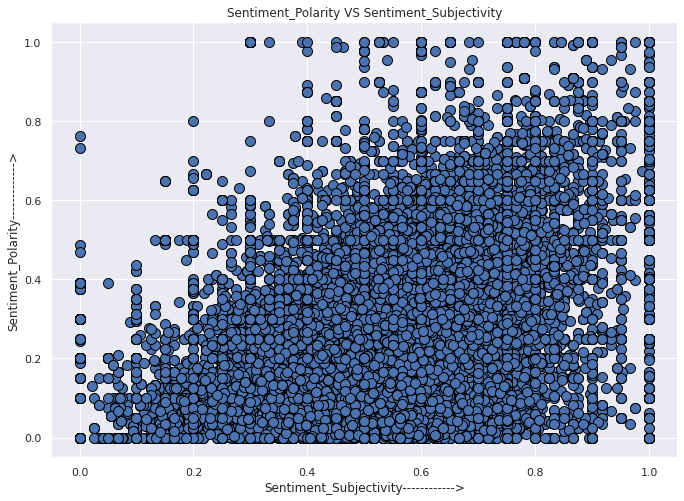

In [ ]:
# Chart - 12 visualization code
#Scatter plot
y=db2["Sentiment_Polarity"].abs()
x=db2["Sentiment_Subjectivity"].abs()
plt.scatter(x,y,s=100,edgecolor="black")
plt.xlabel("Sentiment_Subjectivity------------>")
plt.ylabel("Sentiment_Polarity------------->")
plt.title("Sentiment_Polarity VS Sentiment_Subjectivity")
plt.show();
     


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

Text(0.5, 1.0, 'Sentiment vs Sentiment_Subjectivity')

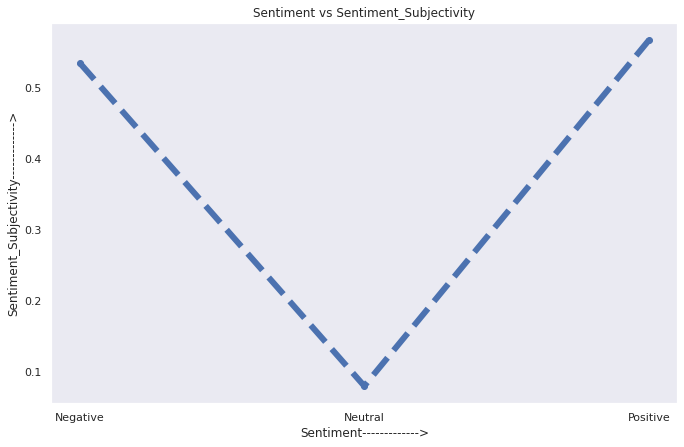

In [ ]:

group=db2.groupby("Sentiment").agg({"Sentiment_Polarity":"sum","Sentiment_Subjectivity":"mean"}).reset_index()
result = pd.DataFrame(group)
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(result["Sentiment"],result["Sentiment_Subjectivity"], label="Sentiment_Subjectivity",linestyle="--",marker="o",linewidth=6)
plt.xlabel("Sentiment------------->")
plt.ylabel("Sentiment_Subjectivity------------->")
plt.title("Sentiment vs Sentiment_Subjectivity")


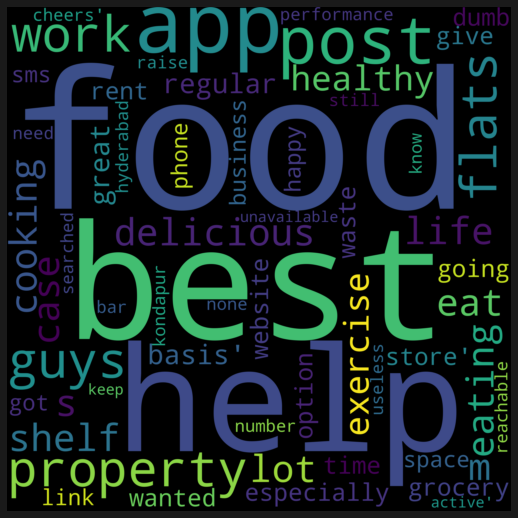

In [ ]:
# Chart - 13 visualization code

Review_notnull = db2[db2['Translated_Review'].notnull()]
#Wordcloud
from wordcloud import WordCloud, STOPWORDS
text = Review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 4000,
    height = 4000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (14,7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

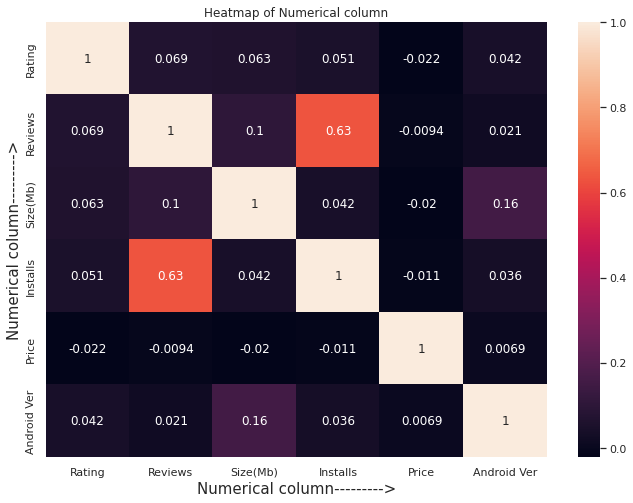

In [ ]:
# Correlation Heatmap visualization code
plt.title("Heatmap of Numerical column")
sns.heatmap(db1.corr(),annot=True,robust=True)
plt.xlabel("Numerical column--------->", fontsize=15)
plt.ylabel("Numerical column--------->", fontsize=15)
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [ ]:
scene2=db1.groupby('Category').agg({"Installs":"mean","Reviews":"mean"}).reset_index()
point_2=pd.DataFrame(scene2)

plt.style.use("fivethirtyeight")
fig = px.line(point_2, x=point_2.Category, y=point_2.columns[:],
              title='Catergory line plot', width=1000)
fig.update_layout(
    updatemenus=[
        dict(
            active=1,
            buttons=list([dict(label="None",
                     method="update",
                     args=[{"visible": [True for _ in range(186)]},
                           {"title": "Catergory line plot",
                            "annotations": []}])]) + list([
                dict(label=f"{j}",
                     method="update",
                     args=[{"visible": [True if i==idx else False for i in range(186)]},
                           {"title": f"{j}",
                            "annotations": []}]) for idx,j in enumerate(point_2.columns[1:])])
            )])
fig.show()

#### Chart - 15 - Pair Plot 

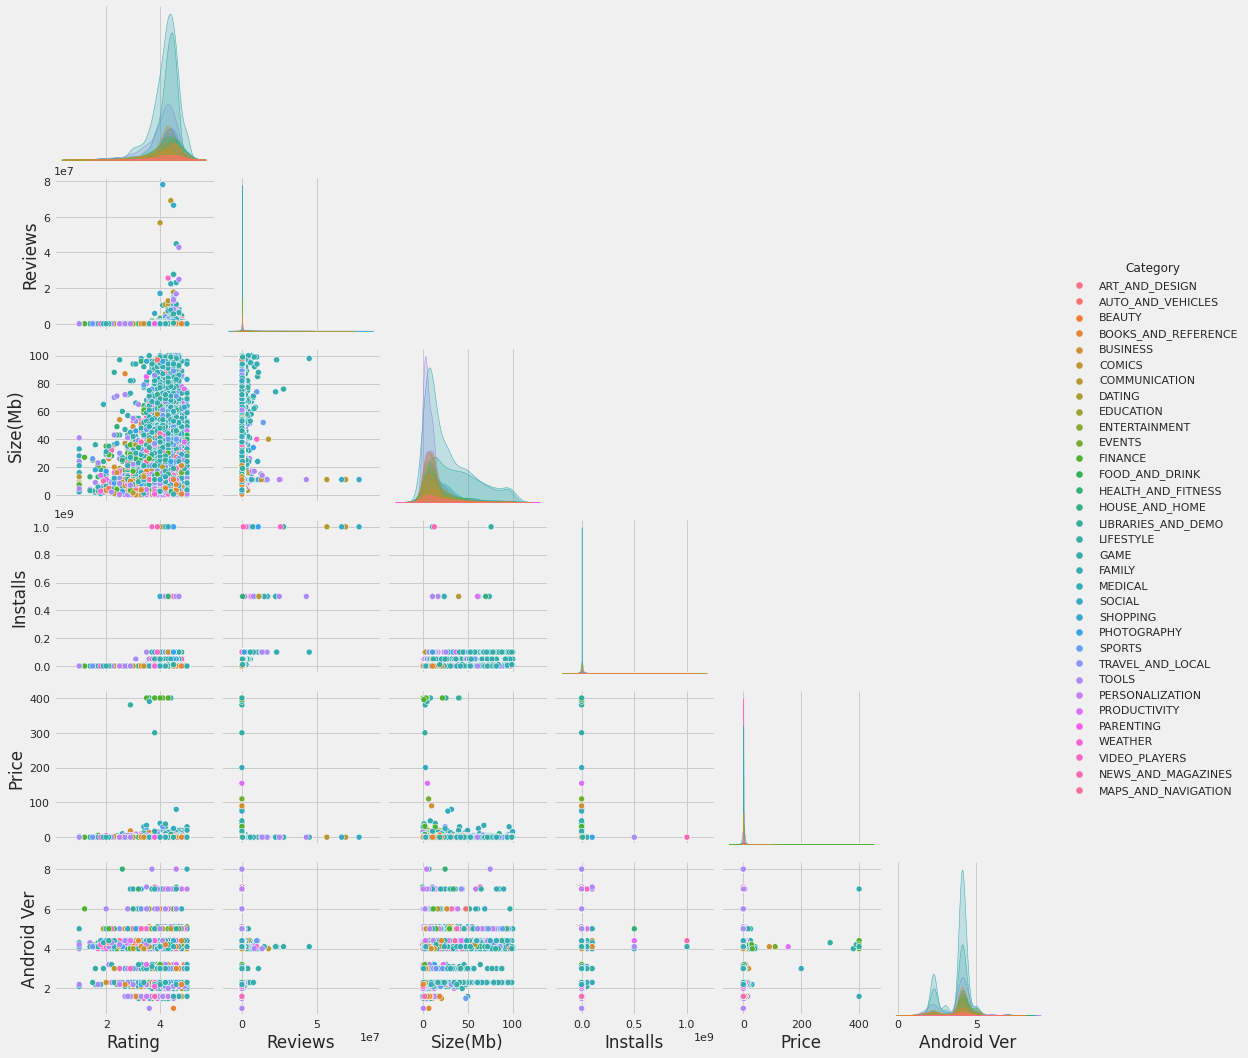

In [ ]:
# Pair Plot visualization code

sns.pairplot(db1, hue ="Category", corner= True)
plt.show()

In [ ]:
db1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size(Mb)             0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver       2980
dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***